# Homework 5 - Exploring StackOverflow!

In [5]:
## Import Utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math
#import pickle
#import pygraphviz
from tqdm import tqdm
from datetime import datetime, date, timedelta
from matplotlib.pyplot import figure
from random import sample

# Import dependencies
import functionality_2 as f2

## 1. Data

Load the data

In [9]:
with open('sx-stackoverflow-a2q.txt') as f:
    a2q = f.readlines()
    f.close()

In [10]:
with open('sx-stackoverflow-c2q.txt') as f:
    c2q = f.readlines()
    f.close()

In [11]:
with open('sx-stackoverflow-c2a.txt') as f:
    c2a = f.readlines()
    f.close()

In [12]:
## Init Graph
G = nx.DiGraph()

In the merged graph we decided to assign the following weigths: 

$\cdot$ 0.6 to *Answers to questions* 

$\cdot$ 0.3 to *Comments to questions* 

$\cdot$ 0.1 to *Comments to answers* 

The reason is that we have thought that the answers to questions are the more relevant than the comments to question, that are more relevant than comments to answers.

In [13]:
## Merge Graph about 1 year
t_start = datetime(2009, 10, 1)
t_end = datetime(2010, 10, 1)

for line in a2q:
    line = line.replace('\n', '')
    line = line.split(' ') 
    t = datetime.fromtimestamp(int(line[2]))
    t_truncated = date(t.year,t.month, t.day)
    if t_start <= t < t_end :
        if G.has_edge(line[0], line[1]) :
            G[line[0]][line[1]]['weight'] += 0.6
            G[line[0]][line[1]]['timestamp'].append(t_truncated)
        else :
            G.add_edge(line[0], line[1], weight=0.6)
            G[line[0]][line[1]]['timestamp']=[t_truncated]

for line in c2q:
    line = line.replace('\n', '')
    line = line.split(' ') 
    t = datetime.fromtimestamp(int(line[2]))
    t_truncated = date(t.year,t.month, t.day)
    if t_start <= t < t_end :
        if G.has_edge(line[0], line[1]) :
            G[line[0]][line[1]]['weight'] += 0.3
            G[line[0]][line[1]]['timestamp'].append(t_truncated)
        else :
            G.add_edge(line[0], line[1], weight=0.3)
            G[line[0]][line[1]]['timestamp']=[t_truncated]

for line in c2a:
    line = line.replace('\n', '')
    line = line.split(' ') 
    t = datetime.fromtimestamp(int(line[2]))
    t_truncated = date(t.year,t.month, t.day)
    if t_start <= t < t_end :
        if G.has_edge(line[0], line[1]) :
            G[line[0]][line[1]]['weight'] += 0.1
            G[line[0]][line[1]]['timestamp'].append(t_truncated)
        else :
            G.add_edge(line[0], line[1], weight=0.1)
            G[line[0]][line[1]]['timestamp']=[t_truncated]

In [21]:
with open('G.pkl', 'wb') as f:
    pickle.dump(G, f)

## 2. Implementation of the backend

## Functionality 1 - Get the overall features of the graph

In [ ]:
## Graph 1

## Init
G_a2q = nx.DiGraph()

t_start = datetime(2010, 10, 1)
t_end = datetime(2010, 11, 1)

## Import data
for line in a2q:
    line = line.replace('\n', '')
    line = line.split(' ') 
    t = datetime.fromtimestamp(int(line[2]))
    t_truncated = date(t.year,t.month, t.day)
    if t_start <= t < t_end :
        if G_a2q.has_edge(line[0], line[1]) :
            G_a2q[line[0]][line[1]]['weight'] += 0.6
            G_a2q[line[0]][line[1]]['timestamp'].append(t_truncated)
        else :
            G_a2q.add_edge(line[0], line[1], weight=0.6)
            G_a2q[line[0]][line[1]]['timestamp']=[t_truncated]

In [ ]:
## Graph 2

## Init
G_c2q = nx.DiGraph()

t_start = datetime(2010, 10, 1)
t_end = datetime(2010, 11, 1)

## Import data
for line in c2q:
    line = line.replace('\n', '')
    line = line.split(' ') 
    t = datetime.fromtimestamp(int(line[2]))
    t_truncated = date(t.year,t.month, t.day)
    if t_start <= t < t_end :
        if G_c2q.has_edge(line[0], line[1]) :
            G_c2q[line[0]][line[1]]['weight'] += 0.3
            G_c2q[line[0]][line[1]]['timestamp'].append(t_truncated)
        else :
            G_c2q.add_edge(line[0], line[1], weight=0.3)
            G_c2q[line[0]][line[1]]['timestamp']=[t_truncated]

In [ ]:
## Graph 3

## Init
G_c2a = nx.DiGraph()

t_start = datetime(2010, 10, 1)
t_end = datetime(2010, 11, 1)

## Import data
for line in c2a:
    line = line.replace('\n', '')
    line = line.split(' ') 
    t = datetime.fromtimestamp(int(line[2]))
    t_truncated = date(t.year,t.month, t.day)
    if t_start <= t < t_end :
        if G_c2a.has_edge(line[0], line[1]) :
            G_c2a[line[0]][line[1]]['weight'] += 0.1
            G_c2a[line[0]][line[1]]['timestamp'].append(t_truncated)
        else :
            G_c2a.add_edge(line[0], line[1], weight=0.1)
            G_c2a[line[0]][line[1]]['timestamp']=[t_truncated]

#### $\cdot$ Is the graph direct or not?

##### Given a graph G=(V,E), if G is a directed graph the sum of the lengths of all the adjacency list is |E|

In [11]:
def adj(Graph):
    l = []
    for line in nx.generate_adjlist(Graph):
        l.append(line.split(' '))
    return l

In [12]:
def is_directed(Graph):
    """
    input:
    - Graph
    return :
    - True if the graph is a directed graph, false otherwise
    
    """
    l=adj(Graph)
    number_nodes=len(list(Graph.nodes))
    sum = 0
    for line in l: 
        sum += len(line)
    if (sum - number_nodes) == len(Graph.edges):  #I subtract the number of nodes because nx.generate_adjlist generates as first element of each list the node we're considering
        return True 
    else:
        return False


In [13]:
print(is_directed(G_a2q))
print(is_directed(G_c2a))
print(is_directed(G_c2q))

True
True
True


In [14]:
# Check
print(nx.is_directed(G_a2q))
print(nx.is_directed(G_c2a))
print(nx.is_directed(G_c2q))

True
True
True


#### $\cdot$ Number of users

The number of users is simply the number of nodes

In [15]:
def n_users(Graph):
    """
    input:
    - Graph
    return :
    - The number of nodes
    """
    l_nodes=list(Graph.nodes)
    n_nodes=len(l_nodes)
    return n_nodes

#### $\cdot$ Number of answers/comments

The number of answers/comments is simply the number of edges

In [16]:
def n_answers(Graph):
    """
    input:
    - Graph
    return :
    - The number of edges
    
    """
    l_edges=list(Graph.edges)
    n_edges=len(l_edges)
    return n_edges

#### $\cdot$ Average number of links per user

In [17]:
def average(n_edges,n_nodes):
    """
    input:
    - The number of edges
    - The number of nodes 
    return :
    - Average number of links per user
    
    """
    return n_edges/n_nodes

#### $\cdot$ Density degree of the graph

The density degree for a directed graph is $D =  \frac{|E|} {(|V| * (|V| - 1))}$ , while the density degree for an undirected graph is $D =  \frac{2|E|} {(|V| * (|V| - 1))}$

In [18]:
def density_degre(Graph,n_edges, n_nodes):
    """
    input:
    - Graph
    - The number of edges
    - The number of nodes 
    return :
    - The density degree
    
    """
    if is_directed(Graph)==True:
        return n_edges/(n_nodes*(n_nodes-1))
    else:
        return 2*n_edges/(n_nodes*(n_nodes-1))

#### $\cdot$ Is the graph sparse or dense?

A sparse graph is a graph for which $|E|$ is much less than $|V^2|$

In [19]:
def graph_mode(n_edges,n_nodes):
    """
    input:
    - The number of edges
    - The number of nodes 
    return :
    - If the graph is sparse or if it is dense 
    """
    if n_edges < (n_nodes**2):
        return "The graph is sparse because the number of edges is much less than the square of the number of nodes "
    else:
        return "The graph is dense because the number of edges is close to the square of the number of nodes"

In [20]:
def functionality_1(Graph):
    """
    input:
    - One of the 3 graphs
    return :
    - a list : [Whether the graph is directed or not, Number of users, Number of answers/comments, Average number of links per user, Density degree of the graph, Whether the graph is sparse or dense]
    
    """
    isdirected=is_directed(Graph)
    numbernodes=n_users(Graph)
    numberedges=n_answers(Graph)
    average_=average(numberedges,numbernodes)
    densitydegree=density_degre(Graph, numberedges, numbernodes)
    graphmode=graph_mode(numberedges,numbernodes)
    return isdirected, numbernodes, numberedges, average_, densitydegree, graphmode 

## Functionality 2 - Find the best users!

In this functionality we create a subgraph of the original one, considering only the given interval of time. We have chosen to consider an interval of three days, in particular we take into account from `25/12/2009` to `27/12/2009`.

The user can choose between 4 metrics to analyze the feature of the selected user:
* **Beetweenness centrality**
* **PageRank score**
* **Closeness centrality**
* **Degree centrality**



#### **Beetweenness centrality**

The Beetweenness centrality of a given node $v$ is given by the ratio between the number of all-pairs shortest paths that pass through $v$ and the number of all possible shortest paths in the graph. Infact, we know that a node is important if it appears in many shortest paths.

$$
C_{B}(v) = \sum_{u,w \in V/\{v\}} \frac{g_{u,w}^{v}}{g_{u,w}} 
$$

Where $V$ are the nodes of the graph and $g_{u,w}^{v}$ are the shortest paths that pass through $v$ and $g_{u,w}$ are the all-pairs shortest paths in the graph.

In the implementation from scratch provided in this notebook we have managed an approximate solution. The algorithm will sample 100 nodes of the graph, (taking care that the chosen node is between them) and compute the beetweenness centrality of this subgraph. This is because our solution take a very long time to compute all the possible shorthest path of a ~4000 nodes graph.

This measure goes from $0$ to $1$ and it can tell us how much crucial our user was in the given interval of time. Higher the value is, higher is the probability to meet him through the path from an user to another.



#### **PageRank score**

PageRank computes a ranking of the nodes in the graph $G$ based on the structure of the incoming links. It was originally designed as an algorithm to rank web pages. It measures the probability to arrive at the given node by randomly surfing around the nodes of the graph.

We can define the PageRank score of the i-th node as:

$$
\pi_{i} = \frac{\alpha}{n} + (1 - \alpha) \cdot \sum_{j:(j,i) \in E} \frac{\pi_{j}}{deg(j)}  
$$

Where $\alpha$ is the **damping parameter**, the probability of being teleportated from the node to another random node. At the end the formula consists in some fixed value plus the sum of the PageRank scores of the neigbhours weighted by the degree of the neighbours. 

We have implemented from scratch this function following the steps of the function implemented by [networkx](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html).

#### **Closeness centrality**

The Closeness centrality measure of a node $v$ is the reciprocal of the average shortest path distance beetween the node $v$ and all the other $n-1$ reachable nodes in the graph.

$$
C_{C}(v) = \frac{n-1}{\sum_{u \in V / \{v\}} d(v,u) }
$$

Where $d(v,u)$ are the distances of all the shortest paths.

It measures how much a node is close, in terms of distance, to all the other nodes in the graph. Obviously because it is an inverted average, more this value is small, more the measure is good.

#### **Degree centrality**

The Degree centrality for a node $v$ is the fraction of nodes it is connected to.

$$
C_{D}(v) = \frac{deg(v)}{n - 1}
$$

Where $deg(v)$ is the degree of the given node and $n-1$ is the maximum number of degree a node can have (when it has an edge with all the other nodes in the graph).

In [9]:
def funct_2(G, node, time_start, time_end, metric):
    '''
    Input:
        node <- a user/node
        time_start <- start of the interval of time
        time_end <- end of the interval of time
        metric <- one of the following metrics:
                    1. Betweenness
                    2. PageRank
                    3. Closeness Centrality
                    4. Degree Centrality
    Output:
        - The value of the given metric applied over the graph on the given 
          interval of time.
    '''
    subG = f2.my_subgraph(G, time_start, time_end)

    if metric == 1: # Betweenness centrality
        bt = f2.Beetweenness(subG, node)
        print(f'\nBetweenness centrality of {node}', bt) 
    
    elif metric == 2: # PageRank
        pr = f2.PageRank(subG, 0.25, node)
        print(f'PageRank score of {node}:', pr)

    elif metric == 3: # Closeness centrality
        cc = f2.Closeness(subG, node)
        print(f'\nCloseneess centrality of {node}', cc) 

    elif metric == 4: # Degree centrality
        degree_centrality = f2.Degree(subG, node)
        print(f'Degree centrality of {node}:', degree_centrality)
    
    else:
        print('Insert a valid metric!')

For this functionality we have chosen to focus on the user (node) $187606$, that seems to have been quite active during the chosen interval of time.

Compute the Beetweenness centrality of the user $187606$.

In [55]:
funct_2(G, '187606', date(2009, 12, 25), date(2009, 12, 27), 1)

100%|██████████| 100/100 [2:04:46<00:00, 74.87s/it]


Betweenness centrality of 187606 0.0295


The user $187606$ has a **Beetweenness centrality** of **0.0295**. It means that (for the 100-nodes sample) almost 3% of the shortest paths pass through that node.

## Functionality 3 - Shortest Ordered Route

Dijkstra's shortest path algorithm works as follows:

> Let distance of start vertex from start vertex = *0*. 

> Let distance of all other vertices from start = *+ Inf*.

**Repeat**
1. Visit the unvisited vertex with the smallest known distance from the start vertex.
2. For the current vertex, examine its unvisited neighbours.
3. For the current vertex, calculate distance of each neighbour from start vertex.
4. If the calculated distance of a vertex is less than the known distance, update the shortest distance.
5. Update the previous vertex for each of the updated distances.
6. Add the current vertex to the ist of a visited vertices.

Until all vertices visited.

In [14]:
def shortest_path(G, source, target):
    unvisited = list(nx.nodes(G)) ## all nodes
    dist = {} ## distances from each node to source
    previous = {} ## previous node
    
    for node in unvisited:
        dist[node] = math.inf
        previous[node] = None
    dist[source] = 0 ## The distance of the source node is 0
    
    while unvisited:  
        dist_min = math.inf
        for node in unvisited:
            if dist[node] <= dist_min :
                dist_min = dist[node]
                u = node
        unvisited.remove(u) ## removing the node from the list of the unvisited nodes
        
        ## if the visited node is the target stop the visits
        if u == target:
            break
            
        ## Examine its neighbours
        for neighbor in G.neighbors(u):
            new_dist = dist[u] + G[u][neighbor]['weight']
            if dist[neighbor] > new_dist:
                ## update the shortest distance
                dist[neighbor] = new_dist
                ## update the previous node
                previous[neighbor] = u
                
    if previous[target] == None:
        return ('Not Connected', [])
    
    path = [target]
    while source not in path:
        path.append(previous[path[-1]])
    path.reverse()

    return dist[target], path # return the distance

In [15]:
def func_3(time, sequence, users):
    ## SubGraph 1 day
    time_start = time[0]
    time_end = time[1]
    subG = nx.DiGraph()
    for edge in list(G.edges):
        if time_start <= G.edges[edge[0], edge[1]]['timestamp'][0] < time_end:
            subG.add_edge(edge[0], edge[1])
            subG[edge[0]][edge[1]]['weight'] = G.edges[edge[0], edge[1]]['weight']
            subG[edge[0]][edge[1]]['timestamp'] = G.edges[edge[0], edge[1]]['timestamp']

    tot_dist = 0
    path_res = [users[0]]
    new_users = [users[0]] + sequence + [users[1]]
    for i in range(len(new_users) - 1):
        dist,path = shortest_path(subG, new_users[i], new_users[i + 1])
        if dist == 'Not Connected':
            return 'Not Connected'
        tot_dist += dist
        path_res += path[1:]
    
    return tot_dist, path_res

In [60]:
## Check
func_3((date(2010, 1, 6), date(2010, 1, 7)), ['190807', '1185165', '237291', '237696', '195257', '7516', '60724', '163534', '231677', '51819',
                                              '109702', '28896', '17516', '167375'] , ('122004', '123451'))

(4.2,
 ['122004',
  '190807',
  '1185165',
  '237291',
  '237696',
  '195257',
  '7516',
  '60724',
  '163534',
  '231677',
  '51819',
  '109702',
  '28896',
  '17516',
  '167375',
  '123451'])

## Functionality 4 - Disconnecting graphs

In [22]:
with open('G.pkl', 'rb') as f:
    G = pickle.load(f)

We found the minimum number of links required to disconnect two users calculating the graph’s maximum flow, because the **max-flow min-cut theorem** states that the maximum flow through a graph from a given source to a given sink is exactly equal to the minimum sum of a cut. 

Firstly we have implemented the following functions:

- **BFS: function for Breadth First Search for a graph**
     - To find the shortest path between the source (user1) and the target (user2). It returns a boolean which said if there is a path and change the list parent used in our functionality to go up the path and change the capacity and flow.
 
- **DFS: function for Depth First Search for a graph**
    - To store what nodes we can reach from the source (at the end) 

In [23]:
def BFS(G, source, target, parent):
    """
    input:
    - Graph
    - The source 
    - The target
    - Array to store the path    
    return :
    - True if there's a path from source to target
    """
    visited ={key: False for key in nx.nodes(G)}
    queue=[]
    queue.append(source)
    visited[source] = True

    while queue:
        u = queue.pop(0)

        for ind in G[u]:
            if (visited[ind] == False) and (G[u][ind]['weight'] > 0) :
                queue.append(ind)
                visited[ind] = True
                parent[ind] = u

    return visited[target] #boolean

def DFS(G,s,visited):
    visited[s]=True
    for node in G[s]:
        if G[s][node]["weight"] > 0 and not visited[node]:
            DFS(G,node,visited)


In [24]:
def funct_4(int1_start, int1_end, int2_start, int2_end, user1, user2):
    """
    input:
    - Two different intervals of time (disjoint or not)
    - Two users which are unique to each interval of time 
        - user_1 only appears in interval 1
        - user_2 only appears in interval 2)
        
    return :
    - Minimum number of links (considering their weights) required to disconnect the two users.
    """
    
    #create the subgraph
    subG = nx.DiGraph()
    
    #add egdes/nodes if it belongs to one of the intervals of time 
    for edge in list(G.edges):
        if (int1_start <= G.edges[edge[0], edge[1]]['timestamp'][0] < int1_end) or (int2_start <= G.edges[edge[0], edge[1]]['timestamp'][0] < int2_end):
            subG.add_edge(edge[0], edge[1])
            subG[edge[0]][edge[1]]['weight'] = G.edges[edge[0], edge[1]]['weight']
            subG[edge[0]][edge[1]]['timestamp'] = G.edges[edge[0], edge[1]]['timestamp']

    subG_i=subG.copy()
    
    # This array is filled by BFS and to store path in parents
    parent = {key: -1 for key in nx.nodes(G)}
    max_flow = 0 
    while BFS(subG, user1, user2, parent) :
        
        # initialize the flow with 'Inf', and find the minimum of the edges of the path found with BFS
        path_flow = float("Inf")
        s = user2
        while(s != user1):
            path_flow = min(path_flow, subG[parent[s]][s]["weight"])
            s = parent[s]

        # Update each edge/weight/capacity along the path 
        max_flow += path_flow
        v = user2
        while(v != user1):
            u = parent[v]
            subG[u][v]["weight"] -= path_flow
            subG[v][u]["weight"] += path_flow
            v = parent[v]

    visited ={key: False for key in nx.nodes(subG)}
    DFS(subG,s,visited)

    # print the edges that we remove (with weight==0)
    # in supposing that in the beginning the graph were without null edge (with weight equal to 0)
    count = 0
    edge_to_remove = []
    for i in nx.nodes(subG):
        for j in subG[i]:
            if (subG[i][j]["weight"] == 0) and (visited[i]):
                print(str(i) + " - " + str(j))
                edge_to_remove.append((i, j))
                count+=1
    # print the number of removed edges (which is the minimum)
    print(count)
    
    return edge_to_remove, subG_i, count

We find an example in looking for two intervals and a user in each who are connected with a path (to have edges to removes, otherwise it will return nothing)

In [25]:
# Example 
int1_start = date(2010, 1, 1)
int1_end = date(2010, 1, 2)

int2_start = date(2010, 9, 1)
int2_end = date(2010, 9, 2)

user1 = '19068'
user2 = '399510'

edge_to_remove, subG_i, count = funct_4(int1_start, int1_end, int2_start, int2_end, user1, user2)

19068 - 102529
19068 - 411247
19068 - 282000
408089 - 361427
4


#### To be sure that our code is correct we did an easier test using our code implemented above

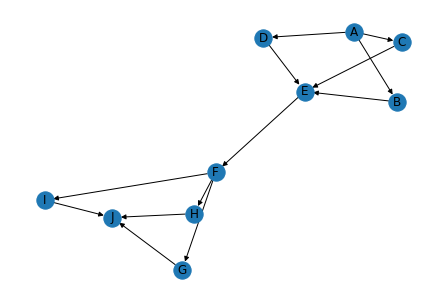

In [50]:
g=nx.DiGraph()
g.add_edge('A','B', weight=1.2)
g.add_edge('A','C', weight=1.3)
g.add_edge('A','D', weight=1.4)
g.add_edge('B','E', weight=1.5)
g.add_edge('C','E', weight=1.6)
g.add_edge('D','E', weight=1.7)
g.add_edge('E','F', weight=1.1)
g.add_edge('F','G', weight=1.3)
g.add_edge('F','H', weight=1.3)
g.add_edge('F','I', weight=1.4)
g.add_edge('G','J', weight=1.2)
g.add_edge('H','J', weight=1.9)
g.add_edge('I','J', weight=1.7)

plt.clf()
nx.draw(g, with_labels=True)
plt.show()



In [55]:
user1 = 'A'
user2 = 'J'
g_i = g.copy()
parent = {key: -1 for key in nx.nodes(g)}
max_flow = 0 
while BFS(g, user1, user2, parent) :
    path_flow = float("Inf")
    s = user2
    while(s != user1):
        path_flow = min(path_flow, g[parent[s]][s]["weight"])
        s = parent[s]
    
    max_flow += path_flow
    
    v = user2 
    
    while(v != user1):
        u = parent[v]
        g[u][v]['weight'] = max(0, g[u][v]['weight'] - path_flow)
            
        if not g.has_edge(v,u) :
            g.add_edge(v,u) 
            g[v][u]["weight"] = 0
        g[v][u]["weight"] += path_flow
        
        v = parent[v]

visited ={key: False for key in nx.nodes(g)}
DFS(g,user1,visited)

for i in nx.nodes(g):
    for j in g[i] :
        if (g[i][j]["weight"] == 0)  and (g_i[i][j]["weight"] > 0) and (visited[i]):
            print(str(i) + " - " + str(j))

E - F


## 3. Implementation of the frontend

### Visualization 1 - Visualize the overall features of the graph

$\cdot$ **a table** with these informations requested i.e.  

$\cdot$ $\cdot$ Whether the graph is directed or not 
       
$\cdot$ $\cdot$ Number of users 
       
$\cdot$ $\cdot$ Number of answers/comments 
       
$\cdot$ $\cdot$ Average number of links per user 
       
$\cdot$ $\cdot$ Density degree of the graph 
       
$\cdot$ $\cdot$ Whether the graph is sparse or dense 

$\cdot$ **a plot of the density distribution of the graph provided as input**

The degree distribution P(k) of a graph is then defined to be the fraction of nodes in the graph with degree k.\
Thus if there are n nodes in total in a graph and $n_k$ of them have degree k, we have $$ P(k)=\frac {n_{k}}{n}.$$

In [1]:
from tabulate import tabulate
def viz_1(Graph):
    '''
    input:
    - Graph
    output:
    -table with some important features that characterize the graph given like input
    -histogram for the nodes's degree distribution
    '''
    isdirected, numbernodes, numberedges, average_, densitydegree, graphmode =functionality_1(Graph)
    
    print(tabulate({'Graph features': ['Graph directed', 'Number of users', 'Number of answers/comments', 'Average number of links per user', 'Density degree of the graph', 'Is the graph sparse or dense?'], 'Values': [isdirected , numbernodes,numberedges, average_ , densitydegree, graphmode ]}, headers="keys", tablefmt='fancy_grid'))
    
    n_nodes=n_users(Graph)
    nodes_degree=[Graph.degree(node) for node in Graph.nodes]
    m=min(nodes_degree)
    M=max(nodes_degree)
    k=np.arange(m,M+1)
    Pk_vector=[0 for i in range(0, M)]
    for nodesdegree in nodes_degree:
        Pk_vector[nodesdegree-1] += 1
    for i in range(len(Pk_vector)):
        Pk_vector[i] = Pk_vector[i]/n_nodes
    
    plt.figure(figsize=(28,10))
    plt.bar(k, Pk_vector)
    plt.xlabel('Degree')
    plt.ylabel('Degree distribution')
    plt.title('Distribution of nodes degree')
        

Hello! Choose one graph by typing a number between 1,2,3.
You are going to get the overall features of the chosen graph


 1


1
╒══════════════════════════════════╤═════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Graph features                   │ Values                                                                                              │
╞══════════════════════════════════╪═════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ Graph directed                   │ True                                                                                                │
├──────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Number of users                  │ 48647                                                                                               │
├──────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Number of answers/comme

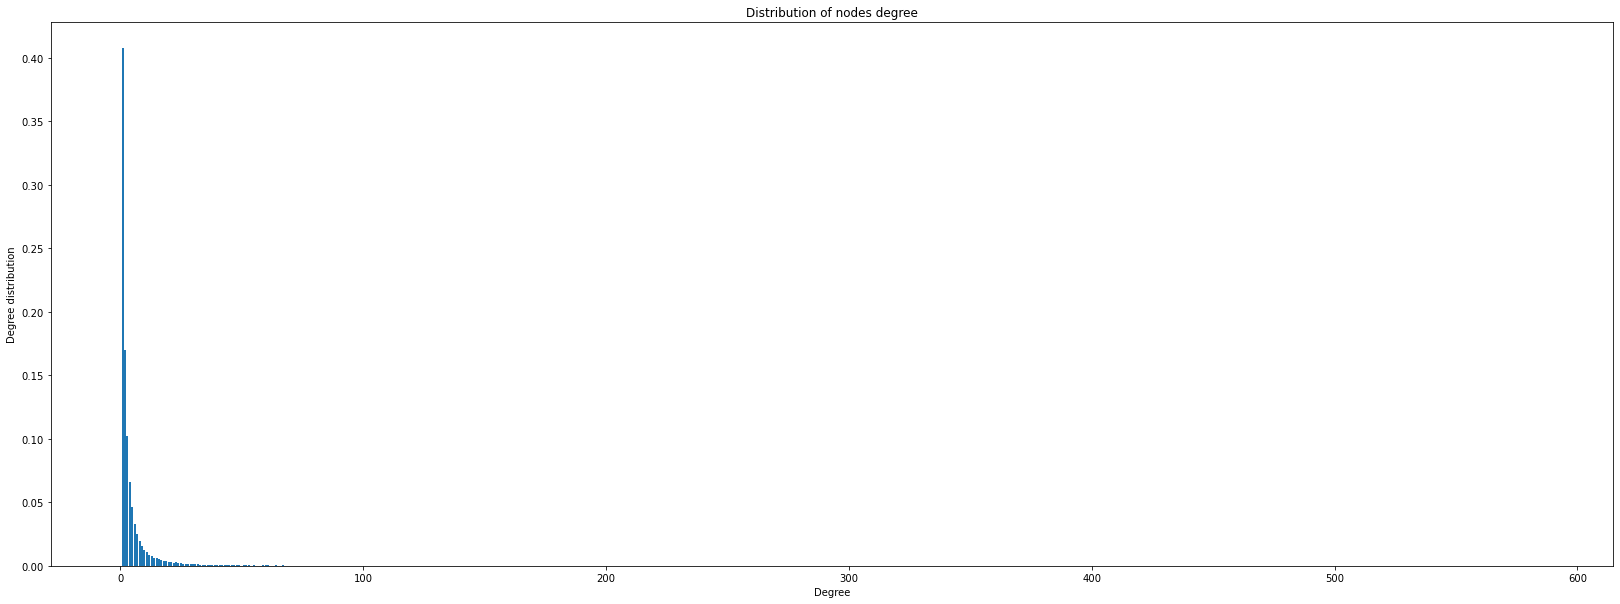

In [23]:
print('Hello! Choose one graph by typing a number between 1,2,3.')
print('You are going to get the overall features of the chosen graph')
graph_number = int(input())
print(graph_number)

if graph_number==1:
    viz_1(G_a2q)
if graph_number==2:
    viz_1(G_c2q)
if graph_number==3:
    viz_1(G_c2a)
    
    

### **Visualization 2**

This is the function for the second visualization. It will plot the node with all its neighbours, it means the user with all the other users with he has interacted in the given interval of time. 

The edges has a different color according to the different type of relationship between the users: it will be darker for an answer to a query and lighter for a comment to an answer.

In addition it will plot the chosen metric evolution into the individual days of the given interval of time.

In [10]:
def viz_2(G):
    '''
    Input:
        - node : the node we are interested in
        - time_start / time_end : the interval of time we are interested in
        - metric : one of the following metrics:
                    1. Betweenness
                    2. PageRank
                    3. Closeness Centrality
                    4. Degree Centrality
    '''
    print('Insert your node:')
    node = str(input())

    print('Insert the first day of the time interval desired: [yyyy/mm/dd]')
    t1 = datetime.strptime(input(), '%Y/%m/%d')
    time_start = date(t1.year, t1.month, t1.day)

    print('Insert the last day of the time interval desired: [yyyy/mm/dd]')
    t2 = datetime.strptime(input(), '%Y/%m/%d')
    time_end = date(t2.year, t2.month, t2.day)

    print('Select your metric!')
    print('Type 1 for Betweenness centrality')
    print('Type 2 for PageRank score')
    print('Type 3 for Closeness centrality')
    print('Type 4 for Degree centrality')
    metric = int(input())

    if metric == 1:
        print('You have chosen Betweenness centrality! Wait for your results...')

    elif metric == 2:
        print('You have chosen PageRank score! Wait for your results...')

    elif metric == 3:
        print('You have chosen Closeness centrality! Wait for your results...')

    elif metric == 4:
        print('You have chosen Degree centrality! Wait for your results...')

    subG = f2.my_subgraph(G, time_start, time_end)

    funct_2(subG, node, time_start, time_end, metric)
    
    f2.my_neighs(subG, node)

    f2.metric_evolution(subG, time_start, time_end, node, metric)

Let's do this for the PageRank metric!

Insert your node:
187606
Insert the first day of the time interval desired: [yyyy/mm/dd]
2009/12/25
Insert the last day of the time interval desired: [yyyy/mm/dd]
2009/12/27
Select your metric!
Type 1 for Betweenness centrality
Type 2 for PageRank score
Type 3 for Closeness centrality
Type 4 for Degree centrality
2
You have chosen PageRank score! Wait for your results...
PageRank score of 187606: 0.0007966033682331506


<Figure size 432x288 with 0 Axes>

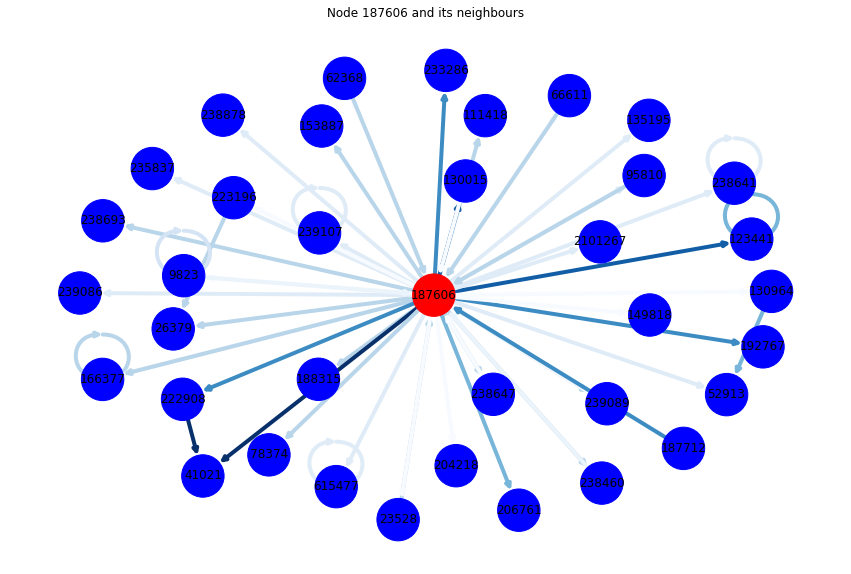

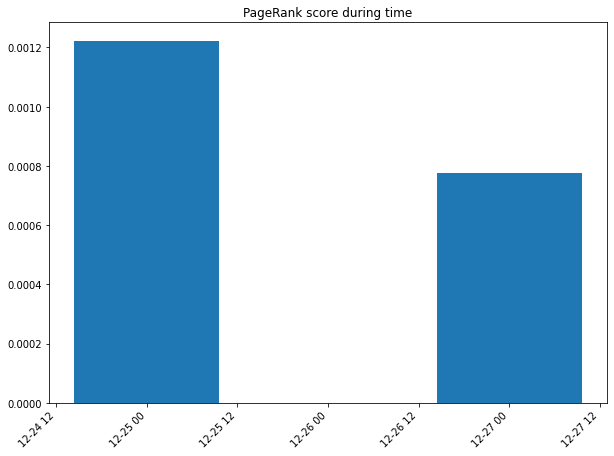

In [11]:
viz_2(G)

The user $187606$ has a **PageRank score** of **0.0008**. It means that the probability to reach him, starting from a random user, in that interval of time are quite low. But it's normal because we are considering a very huge graph.

We can see how he had a strong connection with the user $41021$ because the edge color is darker than the others.

Analyzing the score over the interval of three days we immediately notice that on December 26 the score is equal to 0. It means that reaching that user it's impossible, maybe because he didn't have interaction that day and so he disappeared from the subgraph or that the PageRank algorithm didn't converged. Moreover, on December 25 he had an high score (~0.0012) and a low one on December 27. We can say that this user had more interactions and he was more active on the Christmas day.

Now, let's try the Closeness centrality!

Insert your node:
187606
Insert the first day of the time interval desired: [yyyy/mm/dd]
2009/12/25
Insert the last day of the time interval desired: [yyyy/mm/dd]
2009/12/27
Select your metric!
Type 1 for Betweenness centrality
Type 2 for PageRank score
Type 3 for Closeness centrality
Type 4 for Degree centrality
3
You have chosen Closeness centrality! Wait for your results...


100%|██████████| 3995/3995 [39:17<00:00,  1.69it/s]



Closeneess centrality of 187606 0.6901689987279684


100%|██████████| 1772/1772 [03:33<00:00,  8.28it/s]


<Figure size 432x288 with 0 Axes>

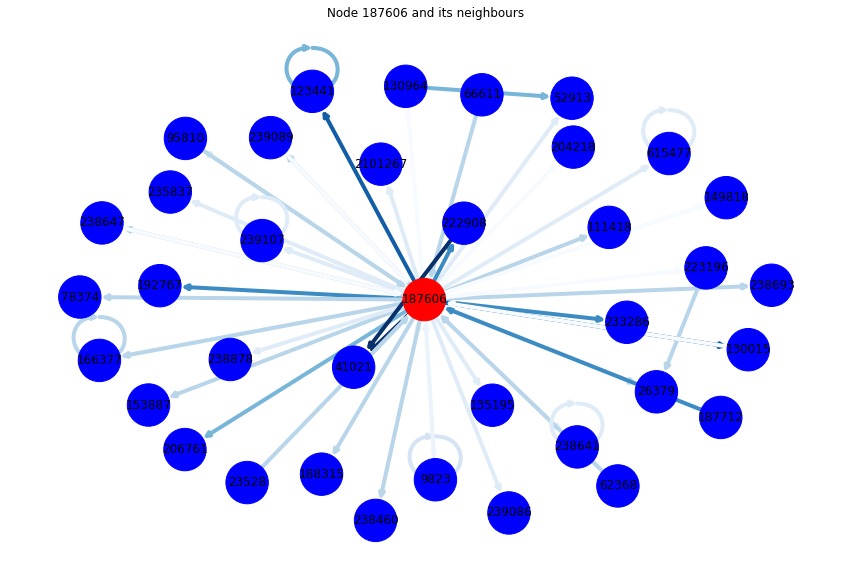

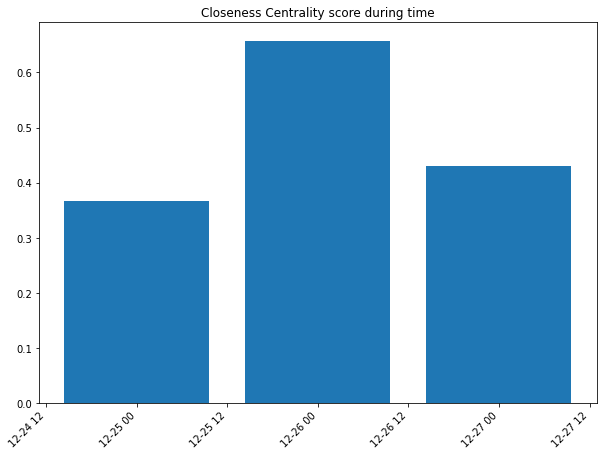

In [11]:
viz_2(G)

The user $187606$ has a **Closeness centrality** of **0.69**. It means that its average distance from all the other nodes he can reach is 1.45.

We can observe from the metric evolution that the day with the highest closeness centrality is December 26 and the day with the lowest one is December 25. It means that on December 26 the average shortest path distance between the user and all the others on StackOverflow was less than the other days.

Finally, try with Degree centrality!

Insert your node:
187606
Insert the first day of the time interval desired: [yyyy/mm/dd]
2009/12/25
Insert the last day of the time interval desired: [yyyy/mm/dd]
2009/12/27
Select your metric!
Type 1 for Betweenness centrality
Type 2 for PageRank score
Type 3 for Closeness centrality
Type 4 for Degree centrality
4
You have chosen Degree centrality! Wait for your results...
Degree centrality of 187606: 0.015523284927391086


<Figure size 432x288 with 0 Axes>

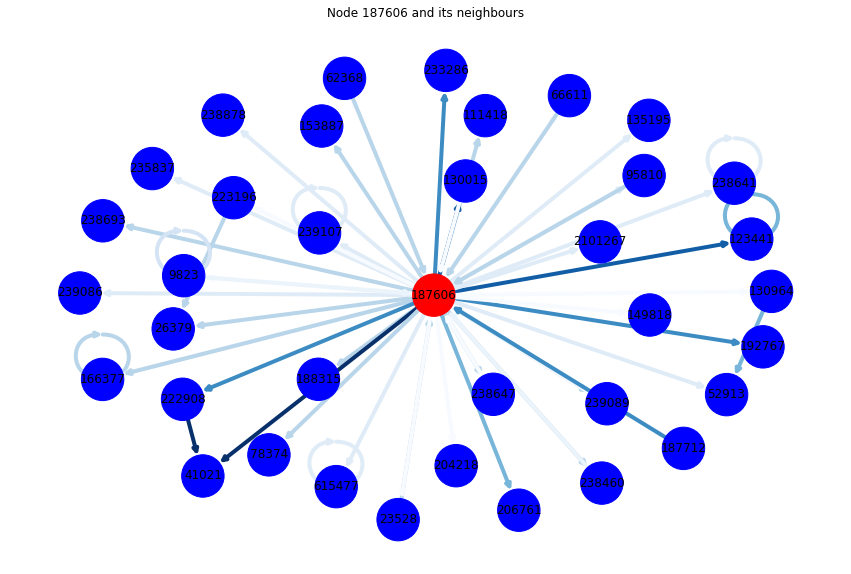

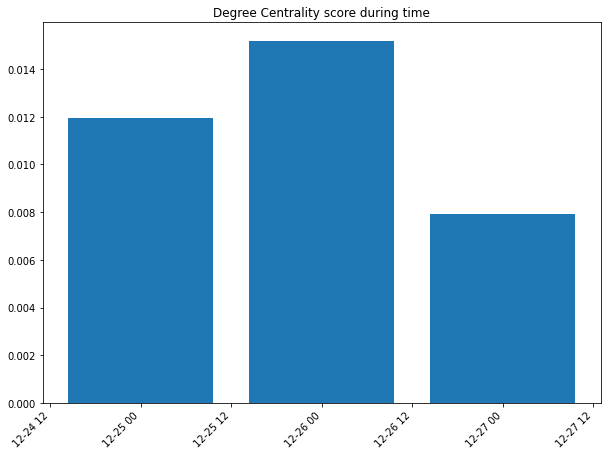

In [12]:
viz_2(G)

The user $187606$ has a **Degree centrality** score of **0.015**, it means that in the given interval of time he had interacted with the 1.5% of the reachable nodes. If we consider that there are 3995 nodes, it means that in three days he interacted with almost 60 different users, quite a lot!

From the metric evolution we can see that he has the best result on December 26 and the lowest one on December 27.

### Visualization 3 - Visualize the Shortest Ordered Route

In [16]:
seq = ['122004', '190807', '219092', '174994', '233867', '53185', '59035', '233228', '230637', '1185165', '79307',
               '177779', '17122', '237696', '237291', '195257', '411472', '607', '7516', '60724', '1144', '163534', '175084',
               '225808', '238134', '219159', '231677', '3571', '244279', '126353', '240698', '201934', '170995', '67350',
               '51819', '198989', '243977', '179910', '223783', '102703', '244184', '26552', '109702', '28896', '17516',
               '198116', '244233', '219862', '99897', '56564', '123451', '219922', '17378', '199722', '243494', '79948', 
               '108663', '140962', '167375', '188822', '90011', '5017'] 

In [17]:
New_G = nx.subgraph(G, seq)

In [18]:
def viz_3(New_G):
    figure(figsize=(12, 8), dpi=80)
    color_map = []
    for node in New_G:
        if node in ['190807', '1185165', '237291', '237696', '195257', '7516', '60724', '163534', '231677', '51819', '109702',
                    '28896', '17516', '167375']:
            color_map.append('green')
        elif node == '122004': 
            color_map.append('red')  
        elif node == '123451':
            color_map.append('orange')
        else:
            color_map.append('lightblue')
    nx.draw_kamada_kawai(New_G, with_labels=True, font_weight='bold', node_color=color_map, node_size=500)
    plt.show()

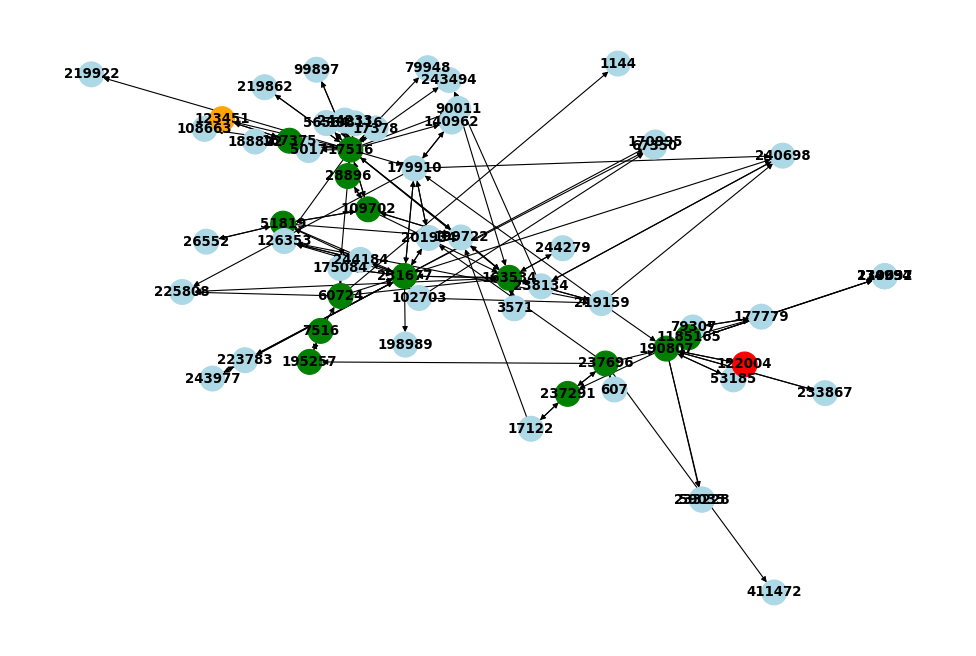

In [20]:
## Plot
viz_3(New_G)

### Visualization 4 - Visualize the overall features of the graph

The function should return the minimum number of links (considering their weights) required to disconnect the two users.

In [26]:
def viz_4():
    # Example 
    y,m,d = np.array(input("Choose the beginning of the first interval written in this way : 2010/11/31 ").split('/')).astype(int)
    int1_start = date(y, m, d)
    y,m,d = np.array(input("Choose the end of the first interval written in this way : 2010/11/31 ").split('/')).astype(int)
    int1_end = date(y, m, d)
    
    y,m,d = np.array(input("Choose the beginning of the second interval written in this way : 2010/11/31 ").split('/')).astype(int)
    int2_start = date(2010, 9, 1)
    y,m,d = np.array(input("Choose the end of the second interval written in this way : 2010/11/31 ").split('/')).astype(int)
    int2_end = date(2010, 9, 2)

    user1 = input("Choose user 1 in the first interval (write a number)")
    user2 = input("Choose user 2 in the first interval (write a number)")

    edge_to_remove, subG_i, count = funct_4(int1_start, int1_end, int2_start, int2_end, user1, user2)
    print(edge_to_remove)
    

[('19068', '102529'),
 ('19068', '411247'),
 ('19068', '282000'),
 ('408089', '361427')]

### User interface

In [26]:
def user_interface():
    print('Hello! This is the list of the functionalities you can choose: \n'
          'Functionality 1: Get the overall features of the graph \n'
          'Functionality 2: Find the best users \n'
          'Functionality 3: Shortest orderer route \n'
          'Functionality 4: Disconnecting graphs')
    print('\n')
    print('Type a number between 1,2,3,4 to have the visualization of the corresponding functionality')
    n=int(input())
    print(n)


    if n==1:
        print('You have selected the functionality 1')
        print('Now you have to choose one graph by typing a number between 1,2,3.')
        graph_number = int(input())
        print(graph_number)
        if graph_number==1:
            viz_1(G_a2q)
        if graph_number==2:
            viz_1(G_c2q)
        if graph_number==3:
            viz_1(G_c2a)
   
    if n==2:
        print('You have selected the functionality 2')
        viz_2(G)

    if n==3:
        print('You have selected the functionality 3')
        viz_3(New_G)
        
    if n==4:
        print('You have selected the functionality 4')
        viz_4()
        

Hello! This is the list of the functionalities you can choose: 
Functionality 1: Get the overall features of the graph 
Functionality 2: Find the best users 
Functionality 3: Shortest orderer route 
Functionality 4: Disconnecting graphs


Type a number between 1,2,3,4 to have the visualization of the corresponding functionality


 1


1
You have selected the functionality 1
Now you have to choose one graph by typing a number between 1,2,3.


 3


3
╒══════════════════════════════════╤═════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Graph features                   │ Values                                                                                              │
╞══════════════════════════════════╪═════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ Graph directed                   │ True                                                                                                │
├──────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Number of users                  │ 33936                                                                                               │
├──────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Number of answers/comme

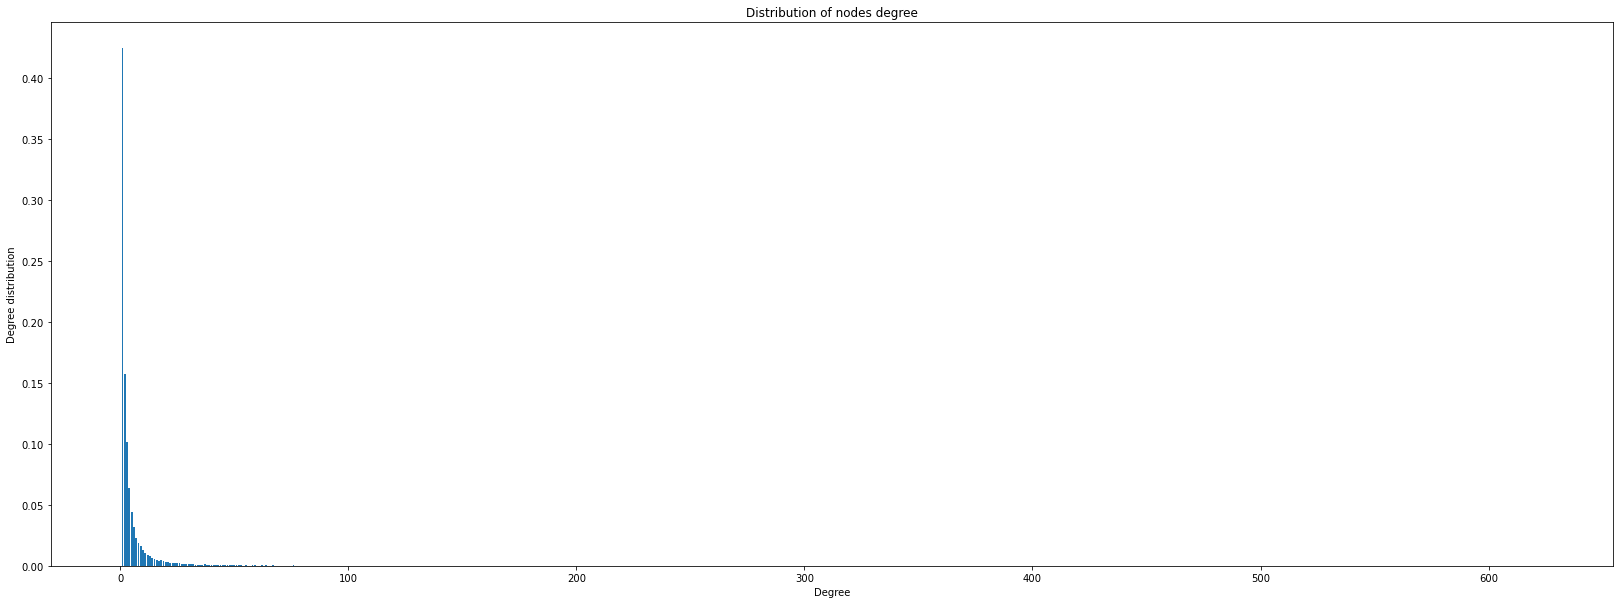

In [27]:
#test
user_interface()

## 4. Algorithmic question

A number n of kids are in a camp. Between some k pairs of them (a kid can be part of more than one pairs) there are often fights. At night there are two dormitories where the kids can sleep. We want, if possible, to assign each kid in one of the two dormitories in such a way that each pair of kids that fights often is assigned to a different dormitory. (There are no space problems and the two dormitories can have different number of kids.)

Give an algorithm that is linear in n and k that is able to answer whether such an assignment is possible and, if so, return one.

In [32]:
def my_algo(kids, pairs):
    '''
    Input:
        - kids : list of kids in the camp
        - pairs : list of pairs of kids
    '''
    
    dorm_1 = [] # List for the first dormitory
    dorm_2 = [] # List for the second dormitory
    visited_kids = [] # list of visited kids
    
    # Focus on the pairs to divide
    for pair in pairs:
        if (pair[0] not in visited_kids) & (pair[1] not in visited_kids):
            visited_kids.append(pair[0]) # Append it to the list of visited
            dorm_1.append(pair[0]) # Assign it to the first dormitory
            
            visited_kids.append(pair[1]) # Append it to the list of visited
            dorm_2.append(pair[1]) # Assign it to the second dormitory
        
        elif (pair[0] in visited_kids) & (pair[1] not in visited_kids):
            # we put the other kid in the pair
            if pair[0] in dorm_1 :
                dorm=dorm_2
            else :
                dorm=dorm_1
            visited_kids.append(pair[1])
            dorm.append(pair[1])
        
        elif (pair[0] not in visited_kids) & (pair[1] in visited_kids):
            # we put the other kid in the pair
            if pair[1] in dorm_1 :
                dorm=dorm_2
            else :
                dorm=dorm_1
            visited_kids.append(pair[0]) 
            dorm.append(pair[0])
           
    # Assign all the others kids in the first dormitory
    for kid in kids:
        if kid not in visited_kids:
            visited_kids.append(kid)
            dorm_1.append(kid)
            
    # Check if we have divided all the fighting couples
    check = True # Initialize a counter
    for pair in pairs:
        if (pair[0] in dorm_1) & (pair[1] in dorm_1):
            print('Two fighting kids in dorm 1!')
            check = False
        if (pair[0] in dorm_2) & (pair[1] in dorm_2):
            print('Two fighting kids in dorm 2!')
            check = False
        
    if not check:
        print("It's impossible to assign these kids in different dorms..")
    else:
        print('First dorm:', dorm_1, '\nSecond dorm:', dorm_2)


Test it with different examples.

In [33]:
pairs = [(1,3),(4,1),(2,4)]
kids = [1,2,3,4,5,6]
my_algo(kids, pairs)

First dorm: [1, 2, 5, 6] 
Second dorm: [3, 4]


In [34]:
pairs = [(1,3),(4,1),(3,4)]
kids = [1,2,3,4,5,6]
my_algo(kids, pairs)

Two fighting kids in dorm 2!
It's impossible to assign these kids in different dorms..


In [35]:
pairs = [(1,3),(4,1),(2,4),(2,1)]
kids = [1,2,3,4,5,6]
my_algo(kids, pairs)

Two fighting kids in dorm 1!
It's impossible to assign these kids in different dorms..
